# DLBDSEDAV01 – Exploratory Data Analysis (EDA) and Visualization  
## Task 1: Visually Exploring a Dataset  

## Qatar Airways Reviews – EDA Project Overview

This project uses Exploratory Data Analysis (EDA) to examine reviews of Qatar Airways from Kaggle. 
The goal is to show trends and patterns in customer feedback.

## 1. Dataset Overview

**Source**: [Kaggle – Qatar Airways Reviews](https://www.kaggle.com/datasets/pranaybshah/qatar-airways-reviews)  
    
**Main Columns**:
- `Rating`: Customer rating from 1 to 10  
- `Review`: Written feedback from passengers  
- `Aircraft`: Aircraft model  
- `Seat Type`: Economy, Business, or First Class  
- `Date Flown`: When the flight took place  
- `Route`: Flight path (origin to destination)  
- `Recommended`: Whether a passenger recommends Qatar Airways

## 2. Project Objectives

- Show customer satisfaction and how ratings are distributed  
- Compare service quality across cabin classes  
- Identify changes in ratings over time  
- Explore common themes in passenger comments  
- Analyze the impact of delays and flight details on customer ratings  
- Visualize patterns across aircraft, country, and traveler types

## 3. Setup: Installation and Library Imports


In [1]:
# Installing necessary libraries 
!pip install pandas numpy plotly wordcloud nltk kaggle

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [2]:
# Importing Kaggle API and downloading the Qatar Airways Reviews dataset
from kaggle.api.kaggle_api_extended import KaggleApi

# Authenticating the Kaggle API
api = KaggleApi()
api.authenticate()

# Download the Qatar Airways Reviews dataset
api.dataset_download_files('pranaybshah/qatar-airways-reviews', path='dataset/', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/pranaybshah/qatar-airways-reviews


In [3]:
# Import the libraries for data analysis and visualization with standard aliases for easier reference.

import pandas as pd                # For working with tabular data
import numpy as np                 # For numerical operations
import plotly.express as px        # For creating interactive charts
import plotly.graph_objects as go  # For custom interactive charts
import matplotlib.pyplot as plt    # For simple static plots
import seaborn as sns              # For static plots and styles
import os                          # For file and path management
import wordcloud                   # For generating word clouds from text data
import nltk                        # For natural language processing tasks

# Load the Qatar Airways Reviews dataset
df = pd.read_csv('dataset/qatar_airways_reviews.csv')
print(os.getcwd())

/home/212dc945-2809-4ef2-8094-48b2c01118f4/C:UsersDavid.kaggle


## 4. Data Processing and Transformation

The dataset will be prepared for analysis through the following steps:

- **4.1 Data Cleaning**
  - Drop duplicate rows and unnecessary columns.
  - Standardize column names (lowercase, underscores, no spaces).
  - Remove rows with missing ratings, seat type, or review text.

- **4.2 Data Transformation**
  - Convert date strings to datetime format.
  - Clean and format categorical columns (`seat_type`, `recommended`, `type_of_traveller`).
  - Group similar aircraft types into categories (e.g., A350, B787).

- **4.3 Feature Overview**
  - Focused on key variables relevant to customer satisfaction analysis:
  - **Numerical**: `rating`  
  - **Categorical**: `seat_type`, `type_of_traveller`, `aircraft`  
  - **Datetime**: `date_published`

In [6]:
# Preview the first few rows
df.head()

Unnamed: 0 Date Published  Rating  Max Rating  \
0           0     2024-03-02     1.0        10.0   
1           1     2024-02-29     1.0        10.0   
2           2     2024-02-29     1.0        10.0   
3           3     2024-02-25    10.0        10.0   
4           4     2024-02-22     7.0        10.0   

                                   Title            Author         Country  \
0             “marred by inconveniences”           Mary Le  United Kingdom   
1                "seat wouldn't stay up"     Brian English          Canada   
2  "no attempt to address our complaint"     Wayne Burgess       Australia   
3          “I hope they update the A380”  Alwaleed Althani           Qatar   
4             "I’d rate them maybe 7/10"         W Warnock  United Kingdom   

         Date                                        Review Body  \
0  2024-03-02   The delay of my flight from Haneda to Doha ca...   
1  2024-02-29    They convinced me that I needed to pay $1500...   
2  2024-02-29    I have sent 5 emails and have only received ...   
3  2024-02-25   We flew on probably the first A380 the airlin...   
4  2024-02-22    Service was ok, pretty good on my aisle and ...   

  Type Of Traveller       Seat Type                              Route  \
0      Solo Leisure   Economy Class  Tokyo to London Heathrow via Doha   
1    Couple Leisure  Business Class                   Doha to Montreal   
2          Business   Economy Class                      Doha to Perth   
3    Couple Leisure     First Class            Doha to London Heathrow   
4    Couple Leisure  Business Class                   Auckland to Doha   

      Date Flown Recommended  Aircraft  Verified  
0     March 2024          no       NaN       0.0  
1  February 2024          no       NaN       1.0  
2  November 2023          no      A380       1.0  
3  February 2024         NaN  A380-800       1.0  
4  February 2024          no      A350       1.0

In [8]:
# Check for completeness, column types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2369 non-null   int64  
 1   Date Published     2369 non-null   object 
 2   Rating             2368 non-null   float64
 3   Max Rating         2368 non-null   float64
 4   Title              2369 non-null   object 
 5   Author             2369 non-null   object 
 6   Country            2369 non-null   object 
 7   Date               2369 non-null   object 
 8   Review Body        2369 non-null   object 
 9   Type Of Traveller  1934 non-null   object 
 10  Seat Type          2369 non-null   object 
 11  Route              1931 non-null   object 
 12  Date Flown         1925 non-null   object 
 13  Recommended        588 non-null    object 
 14  Aircraft           1281 non-null   object 
 15  Verified           1252 non-null   float64
dtypes: float64(3), int64(1),

In [9]:
# Check for missing values
df.isnull().sum()

Unnamed: 0              0
Date Published          0
Rating                  1
Max Rating              1
Title                   0
Author                  0
Country                 0
Date                    0
Review Body             0
Type Of Traveller     435
Seat Type               0
Route                 438
Date Flown            444
Recommended          1781
Aircraft             1088
Verified             1117
dtype: int64

In [10]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Check for duplicate rows
df.duplicated().sum()

0

In [11]:
# Standardize column names (strip spaces, convert to lowercase, use underscores)
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
df.columns

Index(['unnamed:_0', 'date_published', 'rating', 'max_rating', 'title',
       'author', 'country', 'date', 'review_body', 'type_of_traveller',
       'seat_type', 'route', 'date_flown', 'recommended', 'aircraft',
       'verified'],
      dtype='object')

In [12]:
# Convert 'Date Published' column to datetime format
df['date_published'] = pd.to_datetime(df['date_published'], errors='coerce')

# Drop unnecessary index column
if 'unnamed:_0' in df.columns:
    df.drop(columns=['unnamed:_0'], inplace=True)

# Preview result
df[['date_published', 'rating']].head()

date_published  rating
0     2024-03-02     1.0
1     2024-02-29     1.0
2     2024-02-29     1.0
3     2024-02-25    10.0
4     2024-02-22     7.0

In [14]:
# Drop columns not needed for analysis
df.drop(columns=['max_rating', 'author', 'title', 'verified'], inplace=True)

# Remove rows with missing rating, seat type, or review body
df = df.dropna(subset=['rating', 'seat_type', 'review_body'])

# Confirm result
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2368 entries, 0 to 2368
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date_published     2368 non-null   datetime64[ns]
 1   rating             2368 non-null   float64       
 2   country            2368 non-null   object        
 3   date               2368 non-null   object        
 4   review_body        2368 non-null   object        
 5   type_of_traveller  1933 non-null   object        
 6   seat_type          2368 non-null   object        
 7   route              1930 non-null   object        
 8   date_flown         1924 non-null   object        
 9   recommended        588 non-null    object        
 10  aircraft           1280 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 222.0+ KB


In [16]:
# Clean and standardize text based categorical columns

# Standardize 'recommended' column to lowercase values (e.g., 'Yes' to 'yes')
df.loc[:, 'recommended'] = df['recommended'].astype(str).str.strip().str.lower()

# Standardize 'seat_type' to title case (e.g., 'economy' to 'Economy')
df.loc[:, 'seat_type'] = df['seat_type'].astype(str).str.strip().str.title()

# Standardize 'type_of_traveller' (e.g., 'solo leisure' to 'Solo Leisure')
df.loc[:, 'type_of_traveller'] = df['type_of_traveller'].astype(str).str.strip().str.title()

# Clean and group aircraft names

# Convert aircraft strings to uppercase
df.loc[:, 'aircraft'] = df['aircraft'].astype(str).str.upper()

# Group similar aircraft models into main types
df.loc[df['aircraft'].str.contains('A380', na=False), 'aircraft'] = 'A380'
df.loc[df['aircraft'].str.contains('A350', na=False), 'aircraft'] = 'A350'
df.loc[df['aircraft'].str.contains('A330', na=False), 'aircraft'] = 'A330'
df.loc[df['aircraft'].str.contains('A320', na=False), 'aircraft'] = 'A320'
df.loc[df['aircraft'].str.contains('787',  na=False), 'aircraft'] = 'B787'
df.loc[df['aircraft'].str.contains('777',  na=False), 'aircraft'] = 'B777'
df.loc[df['aircraft'].str.contains('737',  na=False), 'aircraft'] = 'B737-MAX'

# Remove rows with missing or unidentified aircraft
df = df[df['aircraft'].notna()]

## 5. Exploratory Data Analysis & Visualization

### 5.1 Overall Customer Satisfaction

**Objective:**  
Understand how satisfied passengers were based on the ratings they gave.

**Analysis:**  
Passenger ratings from 1 to 10 were analyzed to see how scores are spread. A histogram with a box plot highlights the most common ratings and any outliers.

**Visualization:**  
Interactive plotly histogram with a marginal box plot displaying the distribution of customer ratings.

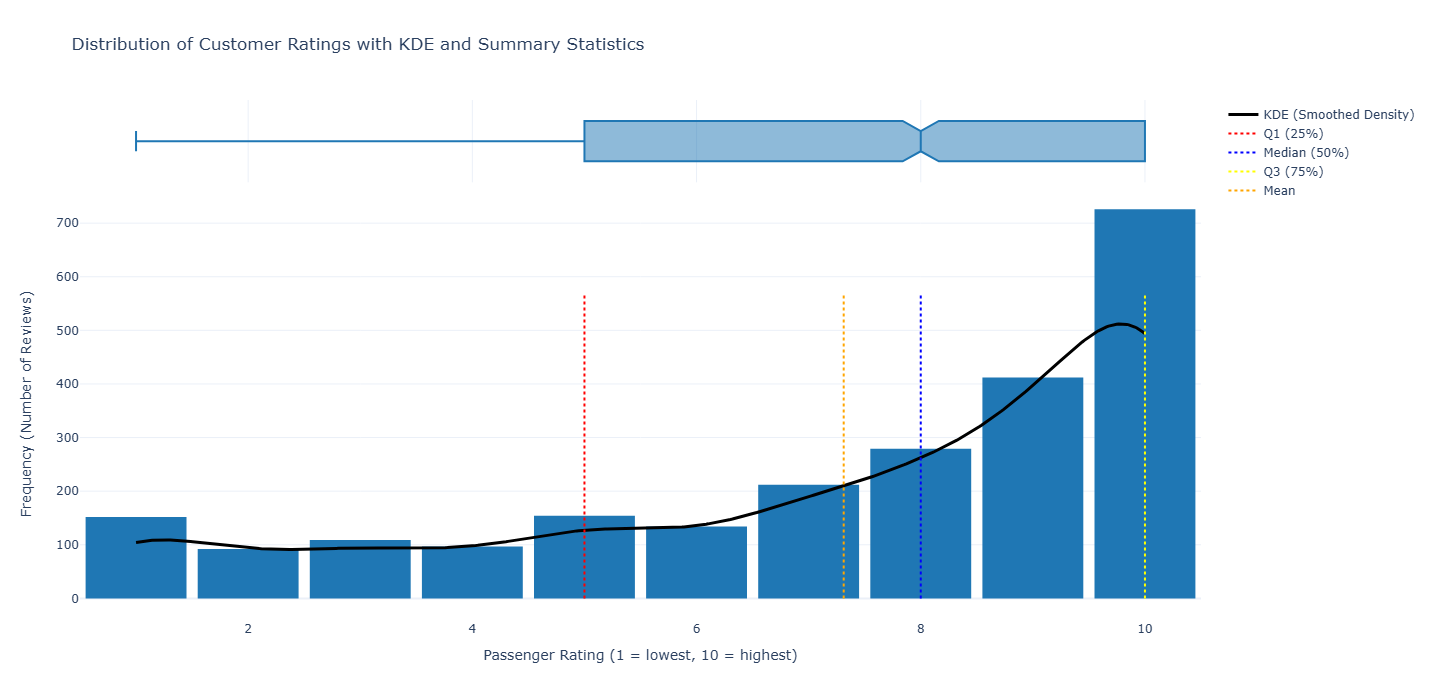

In [19]:
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from scipy.stats import gaussian_kde

# Clean the rating data
ratings = df['rating'].dropna()

# KDE line data
kde = gaussian_kde(ratings)
x_vals = np.linspace(ratings.min(), ratings.max(), 500)
kde_vals = kde(x_vals)

# Summary statistics
q1 = ratings.quantile(0.25)
q3 = ratings.quantile(0.75)
median_val = ratings.median()
mean_rating = ratings.mean()

# Create histogram with horizontal boxplot
fig = px.histogram(
    ratings,
    x=ratings,
    nbins=10,
    marginal='box',
    title='Distribution of Customer Ratings with KDE and Summary Statistics',
    labels={'x': 'Passenger Rating'},
    color_discrete_sequence=['#1f77b4']  # Plotly blue
)

# KDE line (black)
fig.add_trace(go.Scatter(
    x=x_vals,
    y=kde_vals * len(ratings) * (ratings.max() - ratings.min()) / 10,
    mode='lines',
    name='KDE (Smoothed Density)',
    line=dict(color='black', width=3)
))

# Vertical lines for Q1, Median, Q3, Mean
for value, name, color in zip(
    [q1, median_val, q3, mean_rating],
    ['Q1 (25%)', 'Median (50%)', 'Q3 (75%)', 'Mean'],
    ['red', 'blue', 'yellow', 'orange']
):
    fig.add_trace(go.Scatter(
        x=[value, value],
        y=[0, max(kde_vals) * len(ratings)],
        mode='lines',
        name=name,
        line=dict(color=color, width=2, dash='dot')
    ))

# Layout settings
fig.update_layout(
    xaxis_title='Passenger Rating (1 = lowest, 10 = highest)',
    yaxis_title='Frequency (Number of Reviews)',
    bargap=0.1,
    width=1000,
    height=700,
    template='plotly_white'
)

fig.show()

#### 5.1.1 Statistical Summary: Customer Ratings

The main statistics of the `rating` column help quantify how passengers evaluated their experience.

- **Mean**: 7.31  
- **Median**: 8.0  
- **Mode**: 10.0  
- **Standard Deviation**: 2.86  
- **Variance**: 8.19
- **Interquartile Range (IQR)**: 5.0 (Q3: 10 – Q1: 5)

Most passengers gave high ratings, with 10 being the most common. However, the large spread in the data shows that some were very satisfied while others were not.
- **Note**:  
  This analysis is based on reviews that people chose to submit, which may cause bias. Passengers with very good or very bad experiences are more likely to leave feedback.

In [22]:
# Statistical summary of passenger ratings
df['rating'].describe()

count    2367.000000
mean        7.312632
std         2.861161
min         1.000000
25%         5.000000
50%         8.000000
75%        10.000000
max        10.000000
Name: rating, dtype: float64

### 5.2 Service Quality Across Cabin Classes

**Objective:**  
Compare passenger experiences across different seat types.

**Analysis:**  
Violin plots reveal the distribution and density of ratings for each class. This allows us to see how satisfaction varies by seating class.

**Visualization:**  
Violin plot showing rating distribution across Economy, Business, and other seat types.

**Note:** 
- A one-way ANOVA test was used to check if average ratings differ significantly between cabin classes. 
- Only classes with at least two reviews were included.


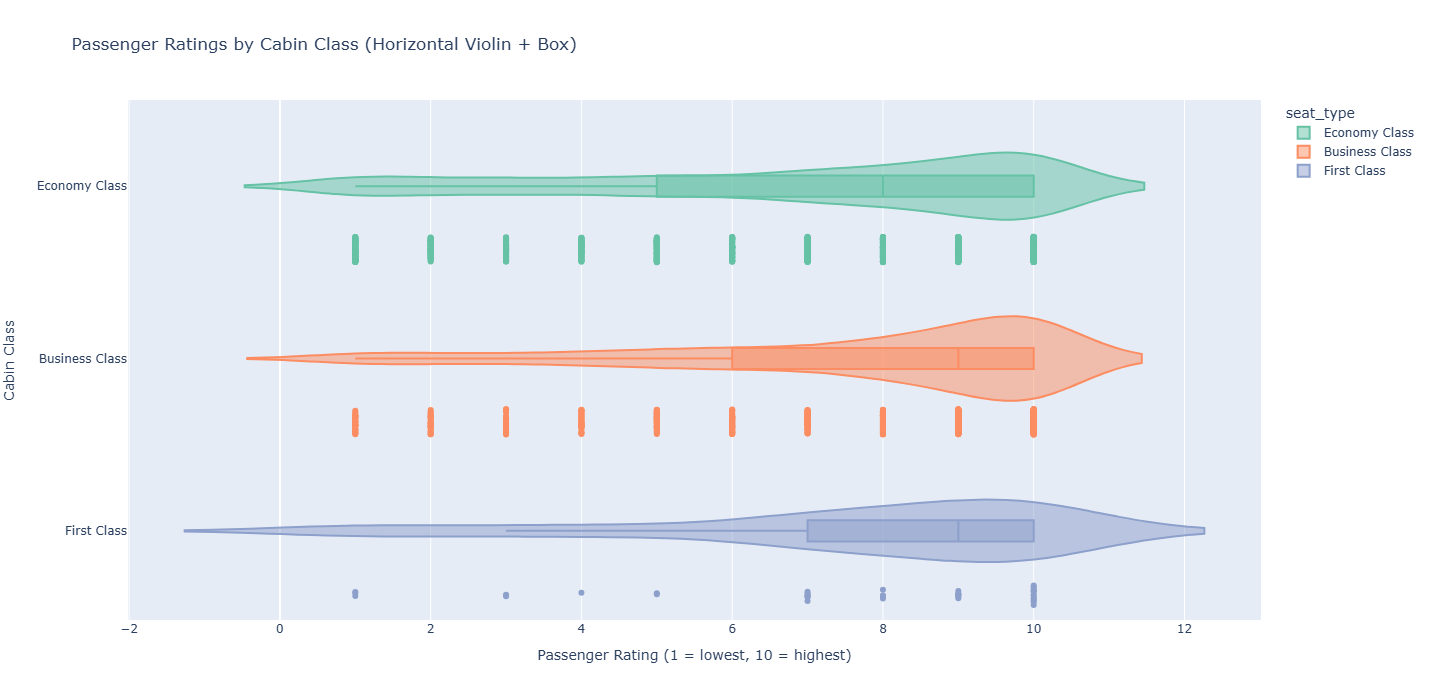

In [24]:
# Remove 'Premium Economy', since it does not exist at Qatar Airways 
df = df[df['seat_type'] != 'Premium Economy']

# Horizontal violin plot
fig = px.violin(
    df,
    y='seat_type',
    x='rating',
    orientation='h',
    box=True,
    points='all',
    color='seat_type',
    title='Passenger Ratings by Cabin Class (Horizontal Violin + Box)',
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_layout(
    xaxis_title='Passenger Rating (1 = lowest, 10 = highest)',
    yaxis_title='Cabin Class',
    width=1000,
    height=700
)

fig.show()

In [25]:
# ANOVA test: checks if average ratings differ across cabin classes
# Only includes classes with at least 2 valid ratings
from scipy import stats

# Filter out rows with missing ratings
df_filtered = df[['seat_type', 'rating']].dropna()

# Keep only cabin classes with at least 2 ratings
valid_classes = df_filtered['seat_type'].value_counts()[df_filtered['seat_type'].value_counts() >= 2].index
df_valid = df_filtered[df_filtered['seat_type'].isin(valid_classes)]

# Group ratings by cabin class
groups = [df_valid[df_valid['seat_type'] == cls]['rating'].values for cls in valid_classes]

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*groups)

# Display results
print("One-way ANOVA results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("The difference in ratings between cabin classes is statistically significant (p < 0.05).")
else:
    print("The difference in ratings between cabin classes is not statistically significant (p ≥ 0.05).")

One-way ANOVA results:
F-statistic: 17.3817
p-value: 0.0000
The difference in ratings between cabin classes is statistically significant (p < 0.05).


### 5.3 Temporal Trends in Passenger Feedback

**Objective:**  
Analyze how ratings changed over time.

**Analysis:**  
By plotting ratings over time and adding a regression line, we identify any trends or seasonal variations in customer satisfaction.

**Visualization:**  
Scatter plot with OLS trendline using Plotly.

**Note:**
- Although a density heatmap is tested, it does not show the time trend clearly.  
- A scatter plot with a trendline is used instead, which gives a better view of rating changes over time.

/tmp/ipykernel_212/2645619684.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



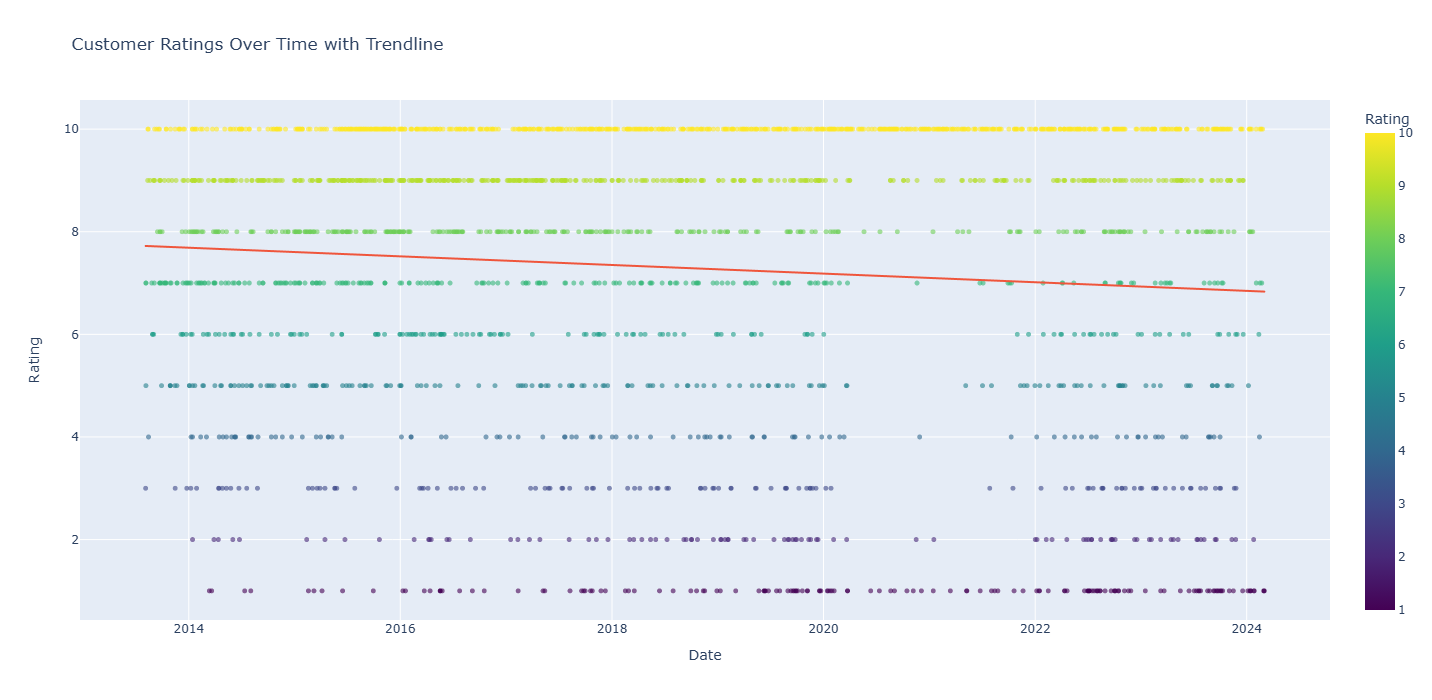

In [26]:
# Plot passenger ratings over time with a linear trendline
# Color represents rating value, trendline helps identify any overall shift

# Ensures 'date_published' is datetime
df['date_published'] = pd.to_datetime(df['date_published'], errors='coerce')

import plotly.express as px

# Plot passenger ratings over time with a linear trendline
fig = px.scatter(
    df,
    x='date_published',
    y='rating',
    trendline='ols',
    color='rating',
    color_continuous_scale='Viridis',
    title='Customer Ratings Over Time with Trendline',
    labels={'date_published': 'Date', 'rating': 'Rating'}
)

# Style adjustments for better readability
fig.update_traces(marker=dict(size=5, opacity=0.6))
fig.update_layout(width=1000, height=700)
fig.show()

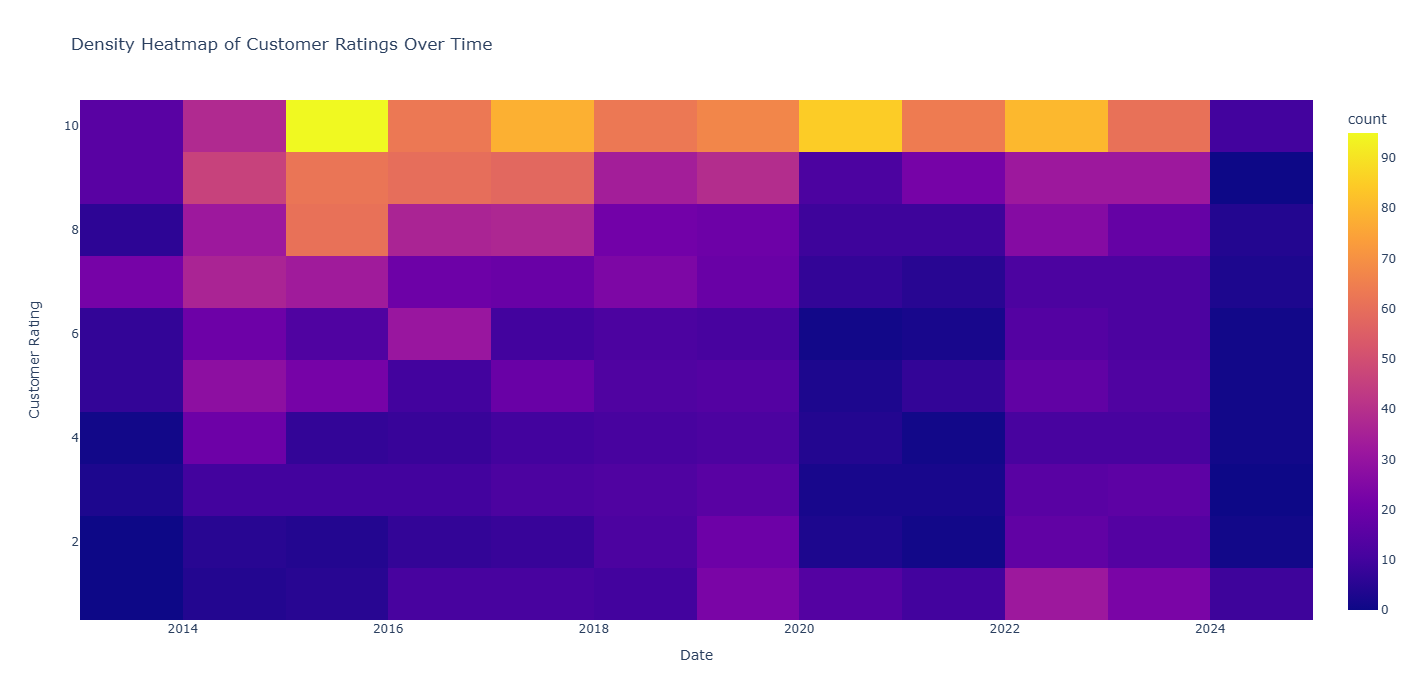

In [27]:
# Density Heatmap: Shows where ratings are concentrated over time
# Not the best for small or uneven data, as it may give a false impression
# A scatter plot with trendline is clearer for time trends

fig = px.density_heatmap(
    df,
    x='date_published',
    y='rating',
    title='Density Heatmap of Customer Ratings Over Time',
    color_continuous_scale='Plasma'  # exact color scheme from your example
)

fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Customer Rating",
    width=1000,
    height=700
)

fig.show()

### 5.4 Common Themes in Passenger Comments

**Objective:**  
Identify the most frequently mentioned topics in customer feedback.

**Analysis:**  
After removing stopwords from the reviews, we identify the top 20 most used words to reveal common customer concerns and highlights.

**Visualization:**  
Plotly bar chart showing the 20 most frequent words used in the reviews.

**Note:**
- Word clouds are popular but not useful for comparing term frequency.  
- Bar charts show the most common words more clearly for this purpose.

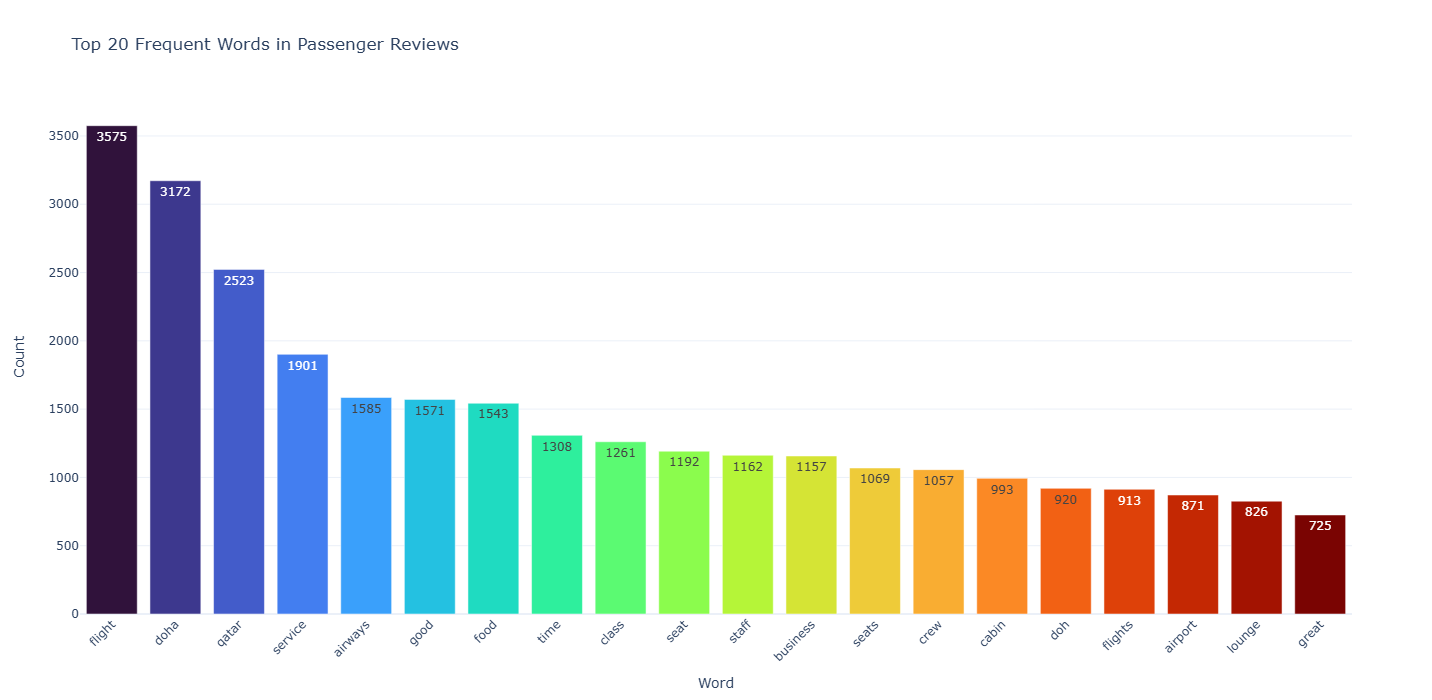

In [28]:
import plotly.express as px
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Extract top 20 words
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['review_body'].fillna(''))
word_counts = X.toarray().sum(axis=0)
top_words = vectorizer.get_feature_names_out()

freq_df = pd.DataFrame({'Word': top_words, 'Count': word_counts})
freq_df = freq_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Assign a unique color to each word using Plotly Turbo scale
turbo_colors = px.colors.sample_colorscale("Turbo", [i / 19 for i in range(20)])

# Add color column to DataFrame
freq_df['Color'] = turbo_colors

# Create the bar chart with per-bar color assignment
fig = px.bar(
    freq_df,
    x='Word',
    y='Count',
    title='Top 20 Frequent Words in Passenger Reviews',
    text='Count',
    color='Word',  # use word as color group
    color_discrete_sequence=freq_df['Color']  # use custom color list
)

fig.update_layout(
    xaxis_tickangle=-45,
    width=1000,
    height=700,
    showlegend=False,
    template='plotly_white'
)

fig.show()

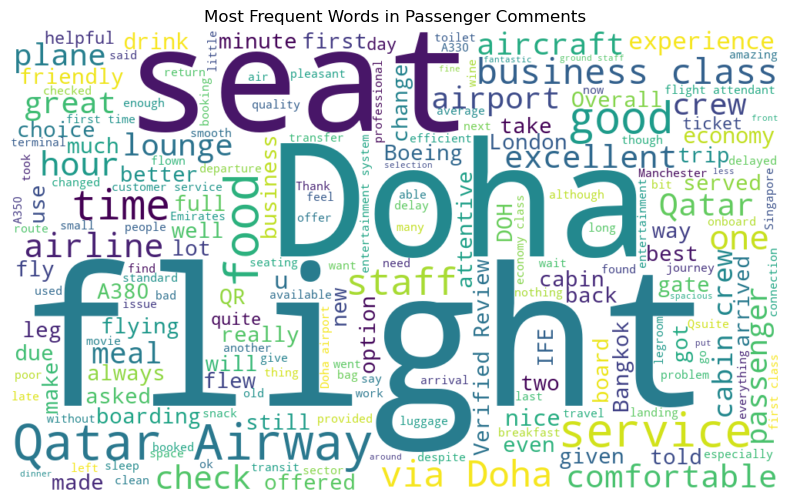

In [29]:
# Word Cloud: Shows common words in passenger comments
# Not recommended for analysis – it looks nice but is hard to read and compare
# Used only for illustration. Replaced by a bar chart for better clarity

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all review texts into one string
text = ' '.join(df['review_body'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=600, background_color='white', colormap='viridis').generate(text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Passenger Comments')
plt.show()

### 5.5 Impact of Delay Mentions on Customer Ratings

**Objective:**  
Check whether reviews that mention delays are linked to lower ratings.

**Analysis:**  
Passenger reviews were scanned for words like "delay" or "delayed". Ratings were then compared to see if delays influenced satisfaction.

**Visualization:**  
A 2D histogram contour plot was used to show how ratings differ for reviews with and without delay mentions.

**Note:**  
- This is a secondary analysis based on text mentions only. It gives some insight but is not the main focus of this study.

/tmp/ipykernel_212/3603358554.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_212/3603358554.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



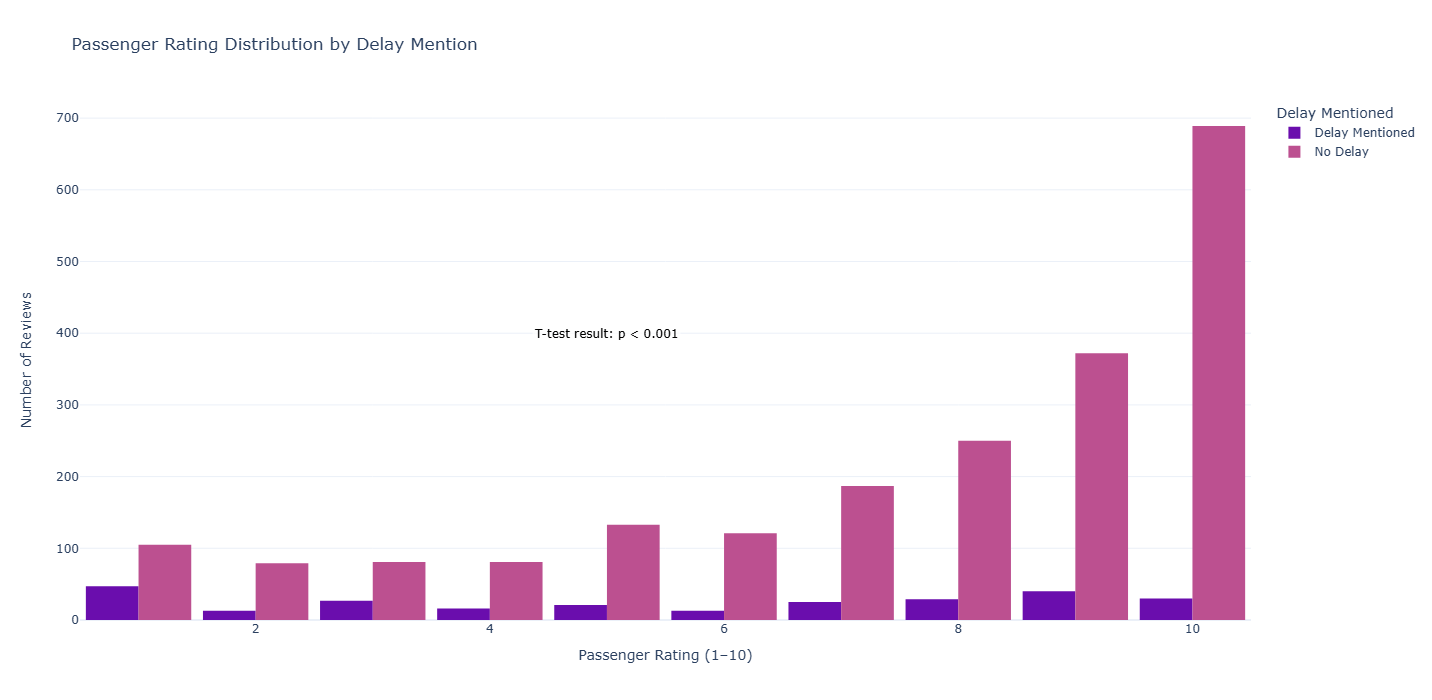

In [30]:
import pandas as pd
import plotly.express as px
from scipy.stats import ttest_ind

# Create 'delay_incident' and label
df['delay_incident'] = df['review_body'].str.contains('delay|delayed', case=False, na=False)
df['delay_group'] = df['delay_incident'].map({True: 'Delay Mentioned', False: 'No Delay'})

# Perform two-sample t-test
ratings_delay = df[df['delay_incident']]['rating'].dropna()
ratings_no_delay = df[~df['delay_incident']]['rating'].dropna()
t_stat, p_value = ttest_ind(ratings_delay, ratings_no_delay, equal_var=False)

# Format p-value for display
p_display = f"p < 0.001" if p_value < 0.001 else f"p = {p_value:.4f}"

# Create grouped histogram
fig = px.histogram(
    df,
    x='rating',
    color='delay_group',
    barmode='group',
    nbins=10,
    title='Passenger Rating Distribution by Delay Mention',
    labels={'rating': 'Rating', 'delay_group': 'Delay Mentioned'},
    color_discrete_sequence=['#6a0dad', '#bc5090']
)

# Add p-value annotation
fig.add_annotation(
    text=f"T-test result: {p_display}",
    x=5,
    y=400,
    showarrow=False,
    font=dict(size=12, color='black'),
    bgcolor='rgba(255,255,255,0.7)'
)

# Layout updates
fig.update_layout(
    xaxis_title='Passenger Rating (1–10)',
    yaxis_title='Number of Reviews',
    bargap=0.1,
    width=1000,
    height=700,
    template='plotly_white'
)

fig.show()

### 5.6 Customer Ratings by Aircraft, Traveller Type, Country, and Seat Type

**Objective:**  
Compare how passenger satisfaction changes based on aircraft, traveler profile, country, and seat class.

**Analysis:**  
- Newer aircraft (A350, A380) are rated higher than older or narrow-body models.
- Business travelers give lower ratings, possibly due to higher expectations.
- Some countries consistently give higher scores.
- First and Business class clearly receive higher ratings than Economy.

**Visualization:**  
Bubble chart subplot (2x2) showing average ratings by category.

**Note:**  
- A bubble chart was chosen over scatter plots to better show the number of reviews per group.


/tmp/ipykernel_212/2369099467.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



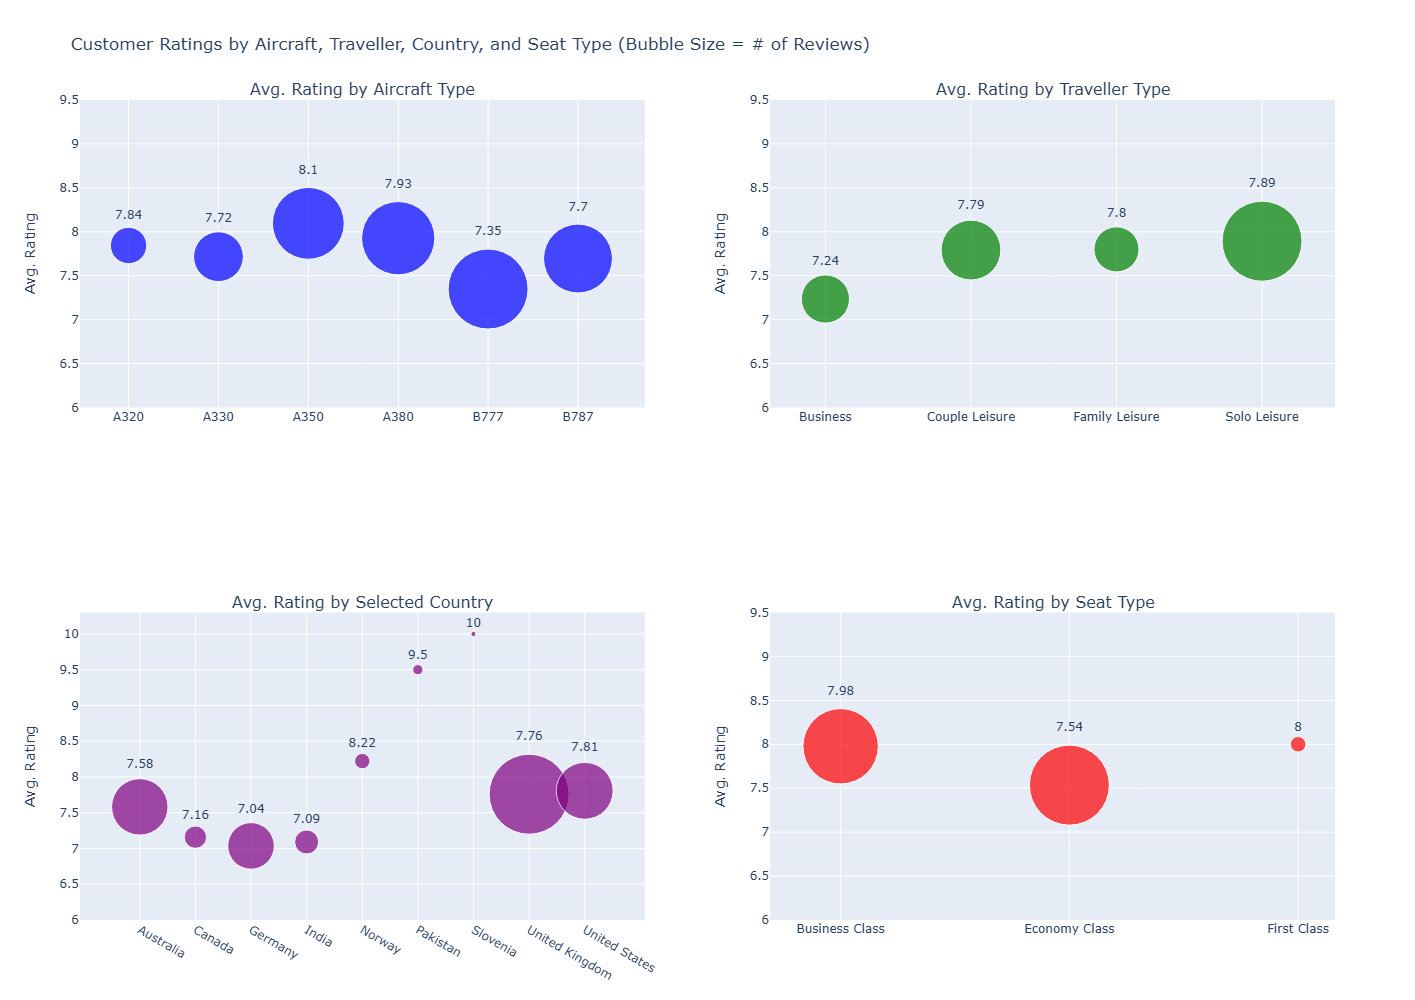

In [31]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create 'simple_aircraft' column from cleaned 'aircraft'
df.loc[:, 'simple_aircraft'] = None
df.loc[df['aircraft'].str.contains('A380', na=False, case=False), 'simple_aircraft'] = 'A380'
df.loc[df['aircraft'].str.contains('A330', na=False, case=False), 'simple_aircraft'] = 'A330'
df.loc[df['aircraft'].str.contains('A350', na=False, case=False), 'simple_aircraft'] = 'A350'
df.loc[df['aircraft'].str.contains('787',  na=False, case=False), 'simple_aircraft'] = 'B787'
df.loc[df['aircraft'].str.contains('777',  na=False, case=False), 'simple_aircraft'] = 'B777'
df.loc[df['aircraft'].str.contains('A320', na=False, case=False), 'simple_aircraft'] = 'A320'
df = df[df['simple_aircraft'].notna()]

# Summary tables
def summary_table(df, column):
    avg = df.groupby(column)['rating'].mean().reset_index()
    count = df[column].value_counts().reset_index()
    count.columns = [column, 'review_count']
    return pd.merge(avg, count, on=column, how='left')

aircraft_rating = summary_table(df, 'simple_aircraft')
traveller_rating = summary_table(df, 'type_of_traveller')
seat_rating = summary_table(df, 'seat_type')
selected = ['United Kingdom', 'United States', 'Australia', 'India', 'Canada', 'Norway', 'Slovenia', 'Russia', 'Pakistan', 'Germany']
country_rating = summary_table(df[df['country'].isin(selected)], 'country')

# Plot
fig = make_subplots(rows=2, cols=2, subplot_titles=[
    "Avg. Rating by Aircraft Type",
    "Avg. Rating by Traveller Type",
    "Avg. Rating by Selected Country",
    "Avg. Rating by Seat Type"
])

fig.add_trace(go.Scatter(
    x=aircraft_rating['simple_aircraft'], y=aircraft_rating['rating'],
    mode='markers+text', text=aircraft_rating['rating'].round(2),
    marker=dict(size=aircraft_rating['review_count'],
                sizemode='area',
                sizeref=2.*aircraft_rating['review_count'].max()/(80.**2),
                color='blue'),
    textposition='top center'), row=1, col=1)

fig.add_trace(go.Scatter(
    x=traveller_rating['type_of_traveller'], y=traveller_rating['rating'],
    mode='markers+text', text=traveller_rating['rating'].round(2),
    marker=dict(size=traveller_rating['review_count'],
                sizemode='area',
                sizeref=2.*traveller_rating['review_count'].max()/(80.**2),
                color='green'),
    textposition='top center'), row=1, col=2)

fig.add_trace(go.Scatter(
    x=country_rating['country'], y=country_rating['rating'],
    mode='markers+text', text=country_rating['rating'].round(2),
    marker=dict(size=country_rating['review_count'],
                sizemode='area',
                sizeref=2.*country_rating['review_count'].max()/(80.**2),
                color='purple'),
    textposition='top center'), row=2, col=1)

fig.add_trace(go.Scatter(
    x=seat_rating['seat_type'], y=seat_rating['rating'],
    mode='markers+text', text=seat_rating['rating'].round(2),
    marker=dict(size=seat_rating['review_count'],
                sizemode='area',
                sizeref=2.*seat_rating['review_count'].max()/(80.**2),
                color='red'),
    textposition='top center'), row=2, col=2)

# Layout and axes
fig.update_layout(
    height=1000,
    width=1500,
    title_text="Customer Ratings by Aircraft, Traveller, Country, and Seat Type (Bubble Size = # of Reviews)",
    showlegend=False
)

fig.update_yaxes(title_text="Avg. Rating", range=[6, 9.5], row=1, col=1)
fig.update_yaxes(title_text="Avg. Rating", range=[6, 9.5], row=1, col=2)
fig.update_yaxes(title_text="Avg. Rating", range=[6, 10.3], row=2, col=1)
fig.update_yaxes(title_text="Avg. Rating", range=[6, 9.5], row=2, col=2)

fig.show()

## 6. Conclusion and Insights from Visual Exploration

#### This analysis shows that most passengers are very satisfied with Qatar Airways.

- Business and First Class receive the best ratings.
- Newer aircrafts as A350 and A380 score highest.
- Passengers from Slovenia, Pakistan and Norway are most satisfied. Germans give the lowest reviews. 
- Business travelers rate their experience lower than leisure travelers.
- Ratings are stable over time, but should still be checked regularly.

#### Recommended business strategy for increasing satisfaction: 

>Improve the  Economy Class experience

>Upgrade or replace older aircrafts

>Explore why German passengers give low ratings.